# Logistic Regression Cuda

## Model and variables should be on the GPU for Cuda version

## 1. Problems of Linear Regression

Example
* Fever
* Input : Temperature
* Output : Fever or No Fever

Remember
* Linear Regression : Minimize the error between the points and line

/home/imateescu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/imateescu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


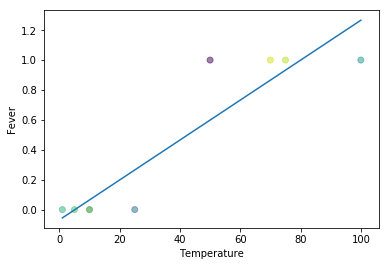

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

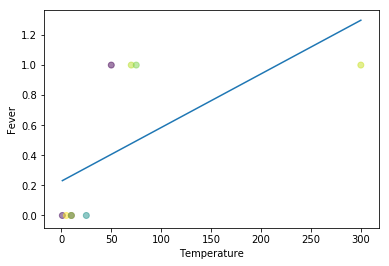

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

** Above we see its a bad idea to use linear regression for classification **

** Problem 2 : Fever poitns not predicted with outliers like 300 in second figure **

## 2. Logisitic Regression : In-Depth

** Cross Entropy Function : https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/ **

Steps
* Load MNIST Dataset
* Make Dataset Iterable
* Create Model Class
* Instantiate Model Class
* Instantiate Loss Class
* Instantiate Optimizer Class
* Train Model

### Step 1 : Loading Train and Test MNIST dataset

** a. Loading MNIST Data set **

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [4]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [5]:
len(train_dataset)

60000

In [6]:
train_dataset[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1176
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1922  0.9333
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0706  0.8588
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.3137
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [7]:
type(train_dataset[0])

tuple

** Tuple of (Image, Label) **

In [8]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [9]:
# Label
train_dataset[0][1]

5

** Displaying MNIST **

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [12]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

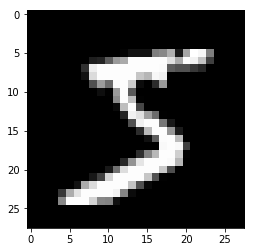

In [13]:
plt.imshow(show_img, cmap='gray')

In [14]:
# Label
train_dataset[0][1]

5

** b. Loading MNIST Test Dataset **

In [15]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [16]:
len(test_dataset)

10000

In [17]:
type(test_dataset[0])

tuple

In [18]:
# Image Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

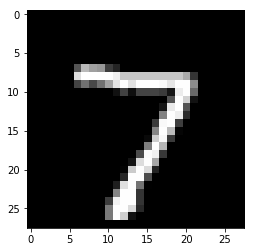

In [19]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [20]:
# Label
test_dataset[0][1]

7

### Step 2 : Make Dataset Iterable

* totaldata : 60000
* minibatch : 100
    * Number of examples in 1 iteration
* iterations : 3000
    * 1 iteration : one mini batch forward & backward pass
* epochs
    * 1 epoch : running through the whole dataset once
    * total : (iterations * minibatch) / totaldata = 5

In [21]:
len(train_dataset)

60000

In [22]:
batch_size = 100
n_iters = 3000

In [23]:
num_epochs = (n_iters * batch_size) / len(train_dataset)
num_epochs = int(num_epochs)
num_epochs

5

** Create Iterable Object : Training Dataset **

In [24]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

** Check Iterability **

In [25]:
import collections
isinstance(train_loader, collections.Iterable)

True

** Create Iterable Object : Testing Dataset **

In [26]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False)

** Check Iterability **

In [27]:
import collections
isinstance(test_loader, collections.Iterable)

True

### Step 3 : Building Model

In [28]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Step 4 : Instantiate Model class

In [29]:
# size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [30]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [31]:
## CHANGES FOR GPU VERSION
if torch.cuda.is_available():
    model.cuda()

### Step 5 : Instantiate Loss Class

In [32]:
# Logistic regression has cross entropy loss (linear regression has MSE)
criterion = nn.CrossEntropyLoss()

** What happens in `nn.CrossEntropyLoss()`? **
* Computes Softmax (logistic/softmax function)
* Computes cross entropy

### Step 6: Instantiate Optimizer Class

In [33]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

** Parameters In-Depth **

In [34]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 2 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7fd7a8ac6570>
2
torch.Size([10, 784])
torch.Size([10])


### Step 7: Train Model

In [35]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            break
#         else:
#             images = Variable(images.view(-1, 28*28))
#             labels = Variable(labels)
    
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
    
        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss : softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images as Variable
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28*28).cuda())
                else:
                    images = Variable(images.view(-1, 28*28))                    

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                ## To USE THE SUM FUNCTION, YOU HAVE TO GET THIS TO CPU FOR CALCULATING CORRECT
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 1.9323925971984863. Accuracy: 67.2
Iteration: 1000. Loss: 1.6294957399368286. Accuracy: 77.14
Iteration: 1500. Loss: 1.3831487894058228. Accuracy: 80.01
Iteration: 2000. Loss: 1.2507996559143066. Accuracy: 81.76
Iteration: 2500. Loss: 1.109553337097168. Accuracy: 82.48
Iteration: 3000. Loss: 0.971668004989624. Accuracy: 83.29


### Saving Model

In [36]:
save_model = False
if save_model is True:
    # Save only parameters
    torch.save(model.state_dict(), "logistic_cuda.pkl")